In [ ]:
!pip install pylatexenc -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install qiskit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.8 MB/s eta 0:00:00
  Created wheel fo

In [ ]:
import numpy as np
import os

from qiskit.tools.visualization import plot_histogram
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from IPython.display import display, Math
import pylatexenc
from qiskit.circuit.library import MCMT

Implementing a Black Box function that returns -1 to the state 111, if for example we are interested in finding the state 011 we can add the following string of code qc.cz(q[1], q[0]) that performs a phase flip such that the index of the state vector of 011 is -1.\
Depending on the state we are interested to find the idea is to perform a phase flip to invert the index of the state vector using a control Z gate

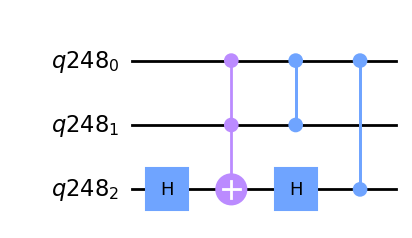

In [ ]:
n=3
N=2**n
q = QuantumRegister(n)
qc = QuantumCircuit(q)

if n==1:
    def black_box(qc, q):
        qc.z(q)
elif n==2:
    def black_box(qc, q):
        for i in range(n):
            qc.s(q[i])
        qc.h(q[1])
        qc.cx(q[0], q[1])
        qc.h(q[1])
        for i in range(n):
            qc.s(q[i])

elif n == 3:
    def black_box(qc, q):
        qc.h(q[2])
        qc.mcx([q[j] for j in range(n-1)], q[n-1])
        qc.h(q[2])
        qc.cz(q[0],q[1])
        qc.cz(q[0], q[2])
#        qc.cz(q[1], q[2])


else:
    def black_box(qc, q):
        qc.h(q[3])
        qc.mcx([q[j] for j in range(n-1)], q[n-1])
        qc.h(q[3])
        qc.ccz(q[2], q[1], q[0])

black_box(qc,q)
cplot=qc.draw(output = "mpl")
display(cplot)

The idea is to build a function that acts as -1 on a single basis state, and +1 on all other status.

We now need to test the built circuit to see if it works

In [ ]:
#This function is just for visualization purposes and has been taken from the Quantum Ispire tutorial webpage
def format_vector(state_vector, decimal_precision=7):
    """ Format the state vector into a LaTeX formatted string.

    Args:
        state_vector (list or array): The state vector with complex
                                      values e.g. [-1, 2j+1].

    Returns:
        str: The LaTeX format.
    """
    result = []
    epsilon = 1/pow(10, decimal_precision)
    bit_length = (len(state_vector) - 1).bit_length()
    for index, complex_value in enumerate(state_vector):
        has_imag_part = np.round(complex_value.imag, decimal_precision) != 0.0
        value = complex_value if has_imag_part else complex_value.real
        value_round = np.round(value, decimal_precision)
        if np.abs(value_round) < epsilon:
            continue

        binary_state = '{0:0{1}b}'.format(index, bit_length)
        result.append(r'{0:+2g}\left\lvert {1}\right\rangle '.format(value_round, binary_state))
    return ''.join(result)

In [ ]:
def plot_states(circuit, register, number_of_qubits=None, backend_name='statevector_simulator'):
   #Run a circuit on all base state vectors and show the output.
   base_states = 2 ** number_of_qubits #Number of base states
   backend = BasicAer.get_backend(backend_name)
   for base_state in range(base_states):
       pre_circuit = QuantumCircuit(register) #define a new circuit
       state = base_state
       for i in range(number_of_qubits):
           if state % 2 == 1:
               pre_circuit.x(q[i]) #if the least significant bit is 1 we apply a Pauli Gate to the i-th bit, flipping it from 0 to 1
           state = state // 2
       final_circuit = pre_circuit.compose(circuit)
       job = execute(final_circuit, backend=backend)
       output_state = job.result().get_statevector(final_circuit)
       text = format_vector(output_state)
       display(Math(text))

if state % 2 == 1 condition checks if the LSB of the state variable is 1. If it is, it means that the corresponding qubit should be initialized to the state |1⟩. Therefore, an X gate is applied to the qubit (pre_circuit.x(q[i])) to flip it from the state |0⟩ to |1⟩.

Base state is just an array that ranges from 0 to 7. If we don't apply the X gate we would have all the states equal to 000

In [ ]:
plot_states(qc, q, 3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We now need to apply inversion about the mean, but the algorithm corresponds to writing HZH
https://anonymousket.medium.com/intro-inversion-about-the-mean-d4eede64aa50
for all the calculation

In [ ]:
from qiskit.circuit.library import MCMT

def inversion_about_average(circuit, register, n_qubits):
    """Apply inversion about the average step of Grover's algorithm."""
    # Hadamards everywhere
    if n==1:
        circuit.x(register[0])
        return
    for j in range(n):
        circuit.h(register[j])

    for j in range(n):
        circuit.x(register[j])
    circuit.h(register[n-1])
    circuit.mcx([register[j] for j in range(n-1)], register[n-1])
    circuit.h(register[n-1])
    for j in range(n):
        circuit.x(register[j])

    # Hadamards everywhere again
    for j in range(n):
        circuit.h(register[j])

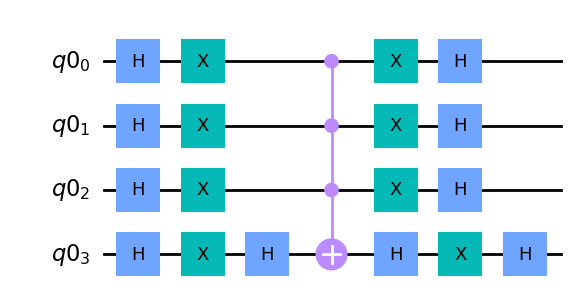

In [ ]:
qInverted = QuantumCircuit(q)
inversion_about_average(qInverted, q, n)
qInverted.draw(output='mpl')

The resulting states are the following:

In [ ]:
qc = QuantumCircuit(q)
inversion_about_average(qc, q, 4)

plot_states(qc, q, 4)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Grover Search Algorithm

The optimal number of iterations for a dataset N = $2^n$ is equal to:\
t = $\frac{\pi \sqrt(N)}{4}$

In [ ]:
theta = 2*np.arcsin(1/np.sqrt(N))
r=np.pi*np.sqrt(N)/4
print("Optimal number of iterations for 4 qubits is:", r.round(2))
print("Theta = ", theta.round(3))

T = int(r)

Optimal number of iterations for 4 qubits is: 3.14
Theta =  0.505


In [ ]:
def input_circuit(circuit, register, n_qubits):
    #Initializing the circuit
    for j in range(n):
        circuit.h(register[j])

q = QuantumRegister(n)
ans = ClassicalRegister(n)
qc = QuantumCircuit(q, ans)

input_circuit(qc, q, n)

backend=BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend=backend, shots=10)
result = job.result()
state_vector = result.get_statevector(qc)

# apply T rounds of oracle and inversion about the average
print('number of iterations T=%d'% T)
for t in range(T):
    qc.i(q[0])
    # Apply T full iterations
    black_box(qc, q)
    qc.i(q[0])
    inversion_about_average(qc, q, n)

# Measure the output register in the computational basis
for j in range(n):
    qc.measure(q[j], ans[j])

number of iterations T=3


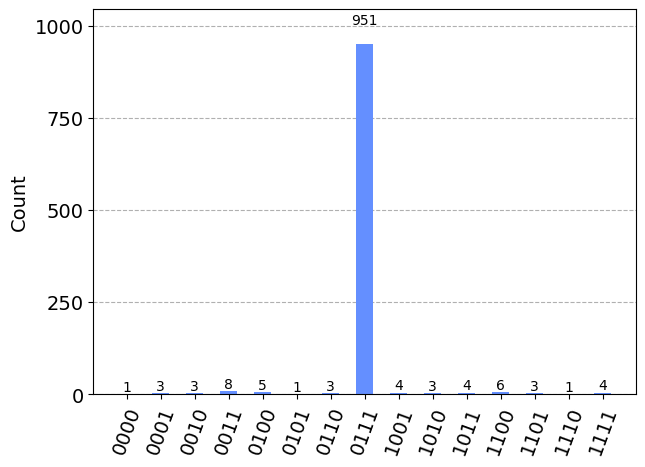

In [ ]:
# Execute circuit
backend=BasicAer.get_backend('qasm_simulator')
job  = execute(qc, backend=backend, shots=1000)
result = job.result()

# Get counts and plot histogram
counts = result.get_counts()
plot_histogram(counts)

Let's try to implement the same on a quantum computer to see the performance

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import IBMQ

IBMQ.load_account()

service = QiskitRuntimeService()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
print(provider.backends())
backend = "ibmq_lima"

/tmp/ipykernel_62/1338325679.py:4: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/tmp/ipykernel_62/1338325679.py:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from I

In [ ]:
from qiskit_ibm_runtime import Sampler, Session

backend = service.get_backend("ibmq_lima")

with Session(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(qc, shots=int(1e4)).result().quasi_dists[0]
    plot_distribution(job.binary_probabilities())

result = job.result()
counts = result.get_counts()


In [ ]:
from qiskit.utils.mitigation import CompleteMeasFitter, complete_meas_cal

Retrieving the last job, in this way we avoid to repeat the computation each time but we can used the jobs already computed

In [ ]:
import numpy as np
job_id = 'cim0oveuepl060qoqgk0'
job = service.job(job_id)
result = job.result()
prova = result.quasi_dists[0]
prova

prova.values()

dict_values([0.050491915364520384, 0.0539217438009855, 0.053782959195856246, 0.060006681117878755, 0.07086015280438321, 0.06816840304096848, 0.06705998472797023, 0.09780864320022838, 0.05066284946831671, 0.051171855984388545, 0.04488259753690956, 0.05610095698363049, 0.06524542256130421, 0.06414258702008907, 0.06564633209398518, 0.08004691509858508])

In [ ]:
qubit_list = [0,1,2,3]
meas_calibs, state_labels = complete_meas_cal(qubit_list=qubit_list, qr=q, circlabel='mcal')

/tmp/ipykernel_62/1307493793.py:2: DeprecationWarning: The function ``qiskit.utils.mitigation.circuits.complete_meas_cal()`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  meas_calibs, state_labels = complete_meas_cal(qubit_list=qubit_list, qr=q, circlabel='mcal')


In [ ]:
backend = provider.get_backend("ibmq_lima")
job = execute(meas_calibs, backend=backend, shots=1000)
cal_results = job.result()

In [ ]:
job_id = 'cim4hejc243ejri80fsg'
job = service.job(job_id)
cal_results = job.result()


In [ ]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, qubit_list=qubit_list, circlabel='mcal')
print(meas_fitter.cal_matrix)

[[0.952 0.039 0.043 0.    0.035 0.    0.    0.    0.05  0.001 0.001 0.
  0.002 0.    0.    0.   ]
 [0.011 0.94  0.001 0.027 0.001 0.035 0.    0.002 0.    0.048 0.    0.002
  0.    0.004 0.    0.   ]
 [0.01  0.    0.917 0.045 0.001 0.    0.036 0.    0.001 0.    0.059 0.003
  0.    0.    0.001 0.   ]
 [0.    0.005 0.011 0.905 0.    0.    0.001 0.043 0.    0.    0.001 0.045
  0.    0.    0.    0.006]
 [0.008 0.001 0.    0.    0.922 0.031 0.027 0.003 0.    0.    0.    0.
  0.045 0.001 0.002 0.   ]
 [0.001 0.005 0.    0.    0.014 0.911 0.    0.019 0.    0.002 0.    0.
  0.001 0.049 0.    0.003]
 [0.    0.    0.007 0.001 0.005 0.    0.903 0.034 0.    0.    0.    0.
  0.001 0.    0.059 0.003]
 [0.    0.    0.    0.009 0.    0.005 0.011 0.869 0.    0.    0.    0.001
  0.    0.001 0.001 0.046]
 [0.018 0.    0.001 0.    0.    0.    0.    0.    0.925 0.04  0.027 0.
  0.029 0.001 0.001 0.   ]
 [0.    0.01  0.    0.001 0.    0.    0.    0.    0.008 0.904 0.001 0.027
  0.001 0.029 0.    0.002]
 [0. 

/tmp/ipykernel_62/2116538148.py:1: DeprecationWarning: The class ``qiskit.utils.mitigation.fitters.CompleteMeasFitter`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  meas_fitter = CompleteMeasFitter(cal_results, state_labels, qubit_list=qubit_list, circlabel='mcal')


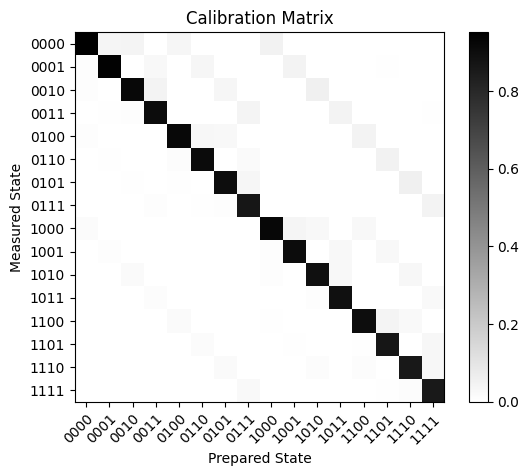

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have computed the calibration matrix using CompleteMeasFitter
calibration_matrix = meas_fitter.cal_matrix
# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Create a heatmap plot of the calibration matrix
im = ax.imshow(calibration_matrix, cmap='binary')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set axis labels
ax.set_xlabel('Prepared State')
ax.set_ylabel('Measured State')

# Set ticks and tick labels
ax.set_xticks(np.arange(calibration_matrix.shape[1]))
ax.set_yticks(np.arange(calibration_matrix.shape[0]))
ax.set_xticklabels(["0000","0001","0010","0011", "0100", "0110", "0101", "0111","1000","1001","1010","1011","1100","1101","1110","1111"])
ax.set_yticklabels(["0000","0001","0010","0011", "0100", "0110", "0101", "0111","1000","1001","1010","1011","1100","1101","1110","1111"])

# Rotate and align the tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Set title
ax.set_title("Calibration Matrix")

# Show the plot
plt.show()


In [ ]:
# What is the measurement fidelity?
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

Average Measurement Fidelity: 0.900438


Applying now the Meas Fitter filter

In [ ]:
meas_filter = meas_fitter.filter

In [ ]:
boh = []
total_shots = 10000
for state, probability in prova.items():
    count = int(round(probability * total_shots))
    boh.append(count)

mitigated_results = meas_filter.apply(boh)
print(mitigated_results)
print(boh)

[ 434.94332422  493.13487019  496.29585133  567.52526071  685.65532966
  671.33177969  645.90320747 1058.18130455  482.0441585   513.32087616
  442.78980263  589.7548582   652.35026598  682.95650914  694.59962648
  889.21297509]
[505, 539, 538, 600, 709, 682, 671, 978, 507, 512, 449, 561, 652, 641, 656, 800]


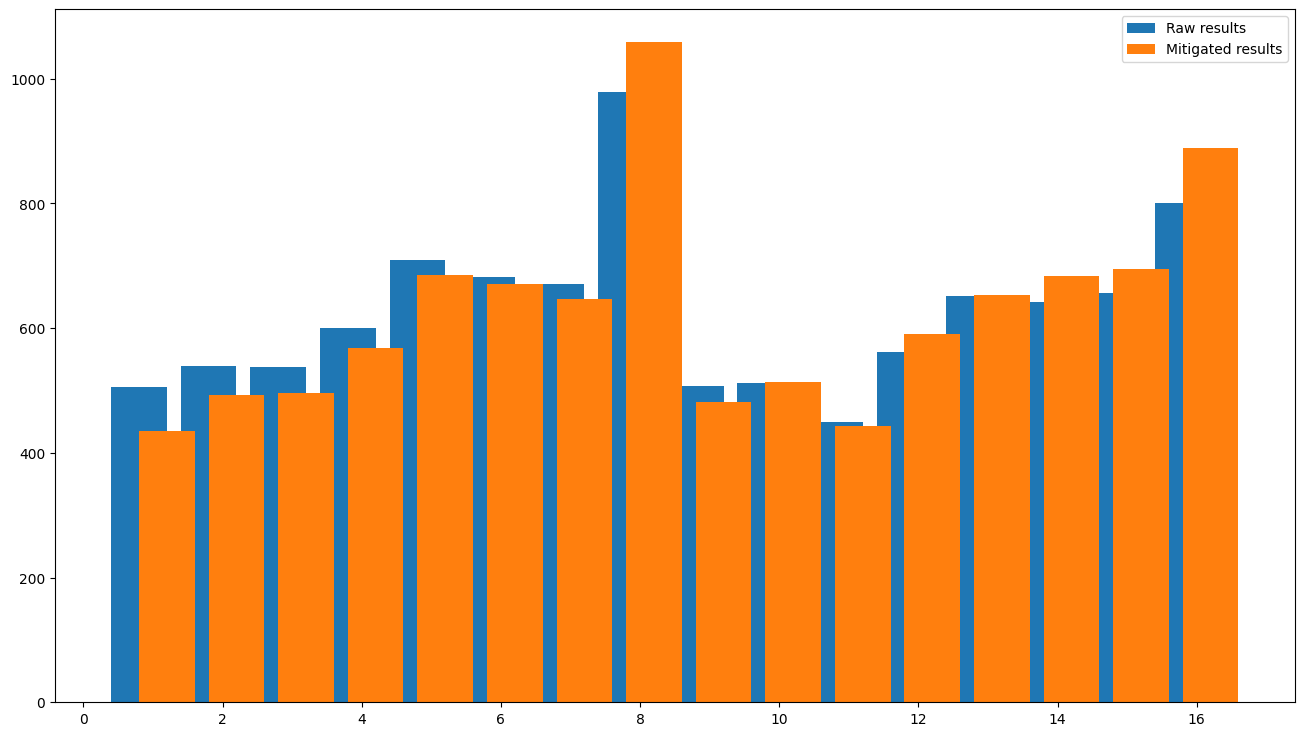

In [ ]:
import matplotlib.pyplot as plt

width = 0.4
x = np.arange(1,17,1)

fig = plt.figure(figsize = (16,9))
# We can set the number of bins with the *bins* keyword argument.
plt.bar(x - width/2,height = boh, label = "Raw results")
plt.bar(x + width/2,height = mitigated_results, label = "Mitigated results")
plt.legend()
